In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\rajan\Downloads\occupancy_data\datatest.txt")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [5]:
df.drop(["date"],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 145.7 KB


In [7]:
df.shape

(2665, 6)

In [8]:
col_names = df.columns

col_names

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [10]:
df['Occupancy'].value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

In [11]:
df['Occupancy'].value_counts()/np.float(len(df))

0    0.635272
1    0.364728
Name: Occupancy, dtype: float64

In [12]:
df.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [13]:
round(df.describe(),2)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.00,2665.00,2665.00,2665.00,2665.00,2665.00
mean,21.43,25.35,193.23,717.91,0.00,0.36
std,1.03,2.44,250.21,292.68,0.00,0.48
min,20.20,22.10,0.00,427.50,0.00,0.00
25%,20.65,23.26,0.00,466.00,0.00,0.00
50%,20.89,25.00,0.00,580.50,0.00,0.00
75%,22.36,26.86,442.50,956.33,0.00,1.00
max,24.41,31.47,1697.25,1402.25,0.01,1.00


Text(0, 0.5, 'HumidityRatio')

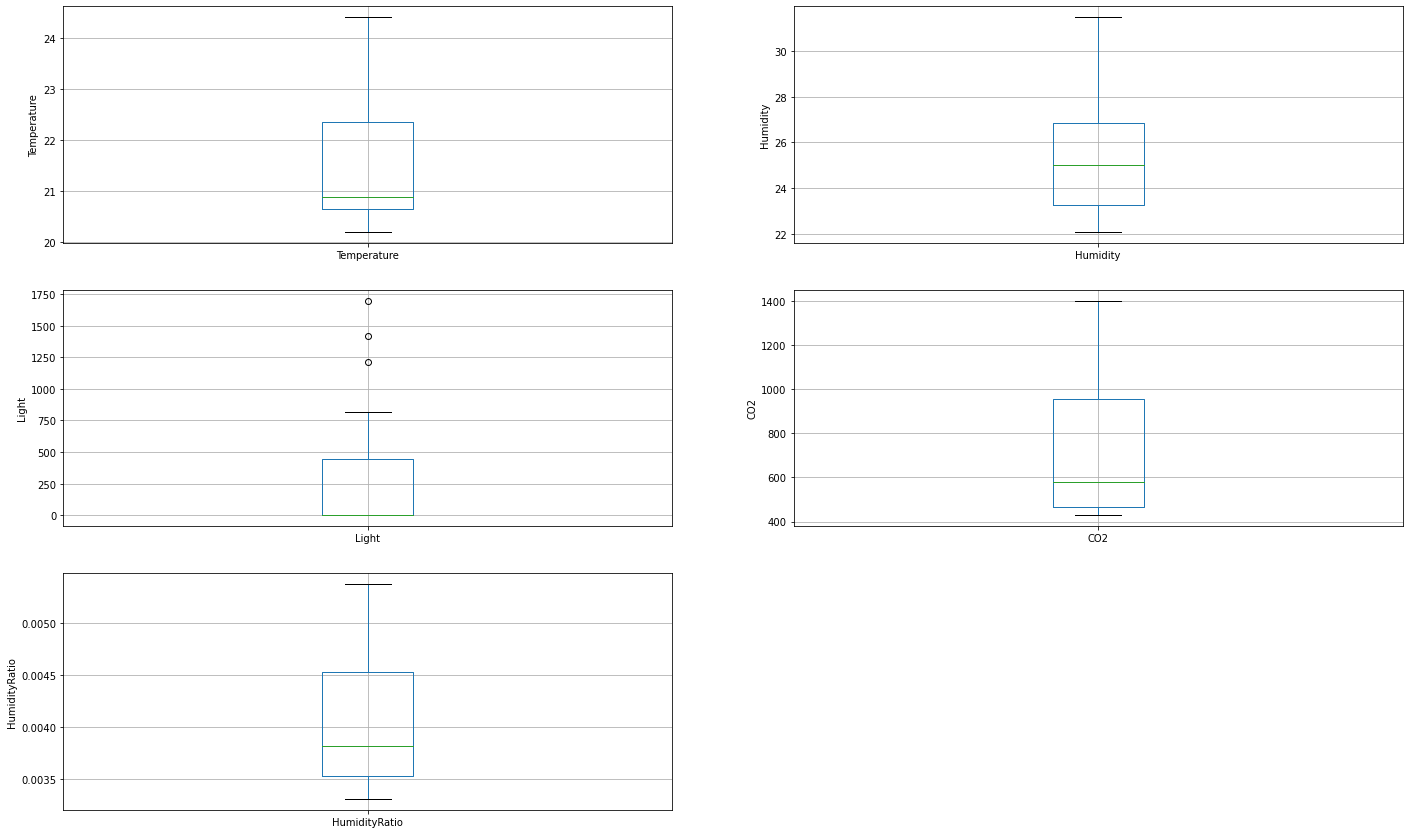

In [14]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Temperature')
fig.set_title('')
fig.set_ylabel('Temperature')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='Humidity')
fig.set_title('')
fig.set_ylabel('Humidity')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='Light')
fig.set_title('')
fig.set_ylabel('Light')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='CO2')
fig.set_title('')
fig.set_ylabel('CO2')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='HumidityRatio')
fig.set_title('')
fig.set_ylabel('HumidityRatio')


Text(0, 0.5, 'Number of pulsar stars')

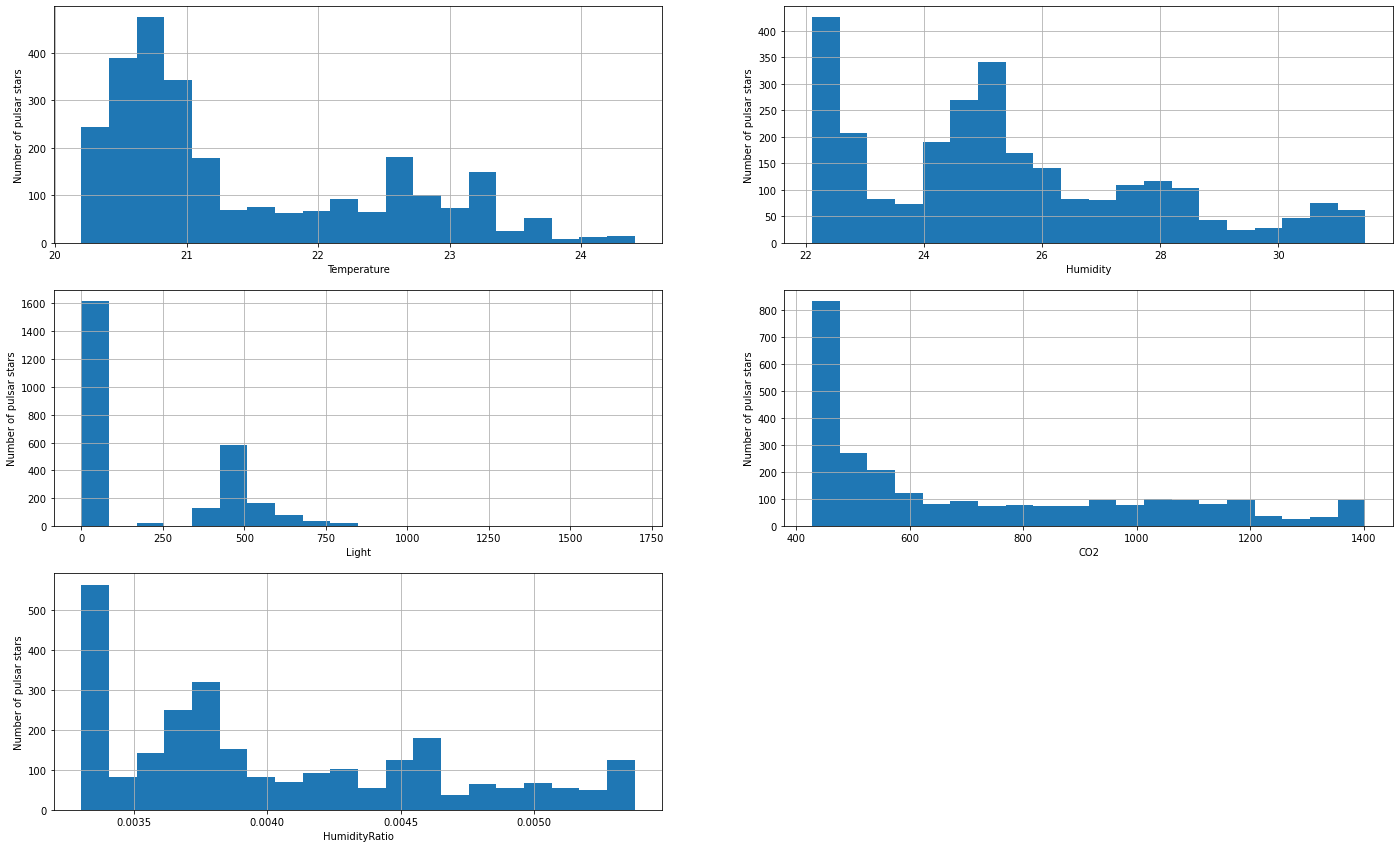

In [15]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Temperature'].hist(bins=20)
fig.set_xlabel('Temperature')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['Humidity'].hist(bins=20)
fig.set_xlabel('Humidity')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['Light'].hist(bins=20)
fig.set_xlabel('Light')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['CO2'].hist(bins=20)
fig.set_xlabel('CO2')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['HumidityRatio'].hist(bins=20)
fig.set_xlabel('HumidityRatio')
fig.set_ylabel('Number of pulsar stars')


In [16]:
X = df.drop(['Occupancy'], axis=1)

y = df['Occupancy']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
X_train.shape, X_test.shape

((2132, 5), (533, 5))

In [19]:
cols = X_train.columns

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [21]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [22]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [23]:
X_train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,2.132000e+03,2.132000e+03,2.132000e+03,2.132000e+03,2.132000e+03
mean,1.355076e-15,8.711545e-16,-1.603887e-17,-2.034020e-16,1.789271e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-1.211556e+00,-1.350134e+00,-7.780665e-01,-1.004991e+00,-1.199858e+00
25%,-7.507702e-01,-8.620014e-01,-7.780665e-01,-8.714195e-01,-8.037498e-01
50%,-5.066346e-01,-1.605678e-01,-7.780665e-01,-4.690563e-01,-3.453240e-01
75%,9.129091e-01,6.489010e-01,9.840825e-01,8.328241e-01,8.296853e-01
max,2.870845e+00,2.494420e+00,5.964820e+00,2.320647e+00,2.193827e+00


In [28]:
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score


svc=SVC() 


svc.fit(X_train,y_train)


y_pred=svc.predict(X_test)


print('Model accuracy scores: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy scores: 0.9775
